In [15]:
import numpy as np
import matplotlib.pyplot as plt


n = 1500          # number of data points
p = 2             # dimension
sigma = 1         # variance of the distribution
meanpos = 0       # centre of the distribution of positive examples
meanneg = 3       # centre of the distribution of negative examples
npos = round(n/2) # number of positive examples
nneg = n-npos     # number of negative examples

# Generate the positive and negative examples
Xpositive = np.random.normal(meanpos,sigma,(npos,p))
Xnegative = np.random.normal(meanneg,sigma,(npos,p))

X = np.vstack((Xpositive,Xnegative))

# Generate the labels
y = np.vstack((np.array([1]*npos).reshape(-1,1), np.array([0]*nneg).reshape(-1,1)))

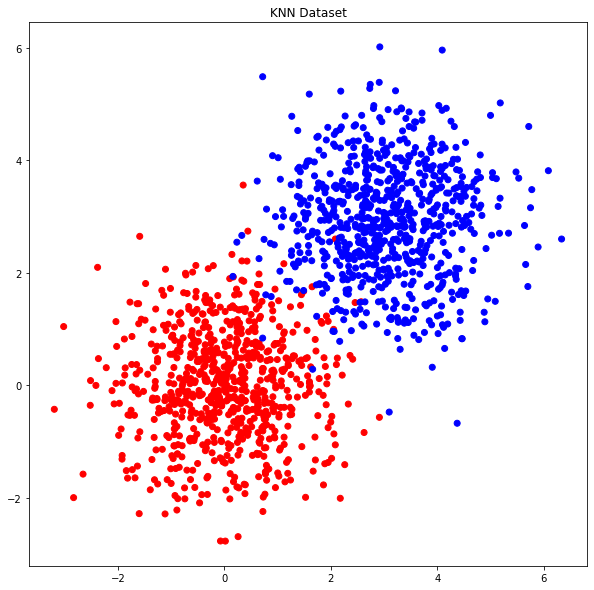

In [70]:
plt.figure(figsize=(10, 10))
plt.title("KNN Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap=plt.cm.bwr)
plt.show();

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = 3
knn = KNeighborsClassifier(n_neighbors=neighbors).fit(X, y.ravel())
scores = cross_val_score(knn, X, y.ravel(), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


In [73]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

def plot_knn_decision(X_train, y_train, clf, title, ax=None):
    # Create color maps
    cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
    cmap_bold = ["darkorange", "c", "darkblue"]

    # plot the decision function
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    ax.scatter(X_train[:, 0], X_train[:, 1],
                c=y_train[:, 0], cmap=plt.cm.bwr)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="contour",
        xlabel="X1",
        ylabel="X2",
        shading="auto",
    )
    ax.set_title(title)

/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


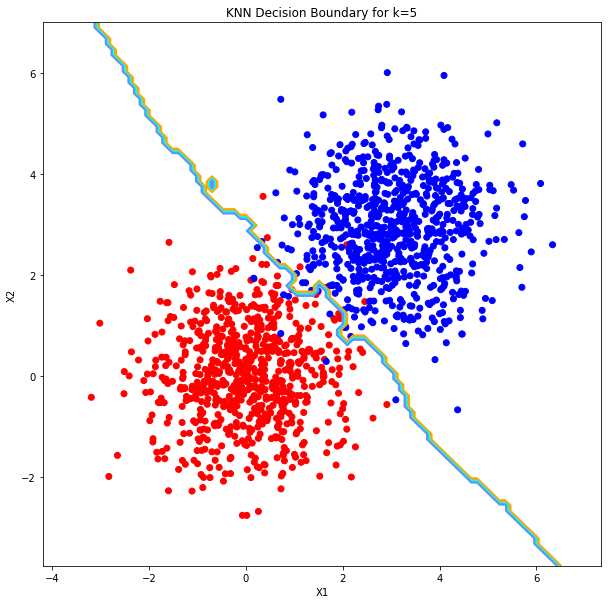

In [74]:
plot_knn_decision(X, y, knn, f"KNN Decision Boundary for k={neighbors}")

/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


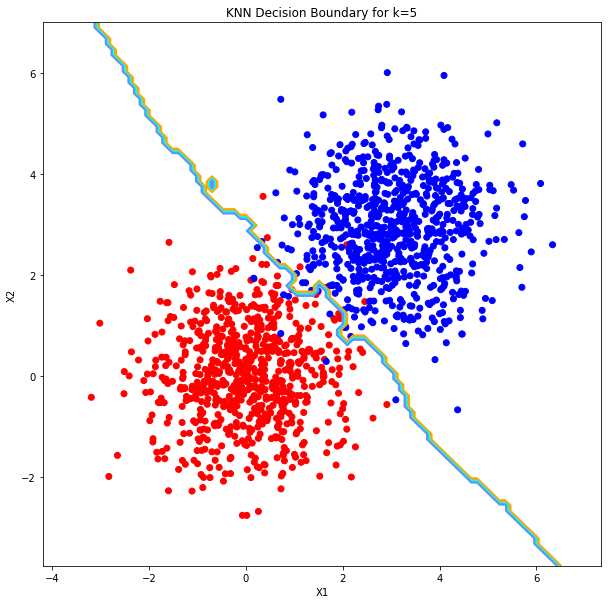

In [75]:
neighbors = 5
knn = KNeighborsClassifier(n_neighbors=neighbors).fit(X, y.ravel())
plot_knn_decision(X, y, knn, f"KNN Decision Boundary for k={neighbors}")

/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/inspection/_plot/decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


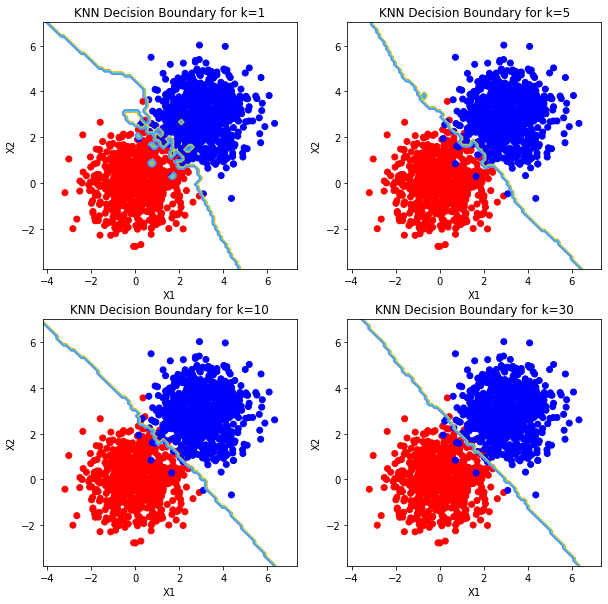

In [80]:
# Plot 4 subplots, one for each value of k=1,5,10 and 30 by calling the function above
# in two rows and two columns.
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, k in enumerate([1, 5, 10, 30]):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X, y.ravel())
    plot_knn_decision(X, y, knn, f"KNN Decision Boundary for k={k}", axs[i // 2, i % 2])
